In [58]:
'''
Código para testar funcionalidades com o hdf do modis
'''

'\nCódigo para testar funcionalidades com o hdf do modis\n'

In [59]:
import numpy as np
from pyhdf.SD import *
import os
import time
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [57]:
lat_mara = -(3 + 12/60 + 46.70/3600)
lon_mara = -(60 + 35/60 + 53/3600)
coord_mara = np.array((lat_mara, lon_mara))
initial_time = time.mktime(time.strptime("00:00 01/01/1993", "%H:%M %d/%m/%Y"))

In [4]:
path = "/home/danilo/dados-ic/modis-aqua/MYD06_L2.A2013344.1815.006.2014268222951.hdf"
lat_mao = -(3 + 12/60 + 46.70/3600)
lon_mao = -(60 + 35/60 + 53/3600)

In [5]:
    sd = SD(path)
    lat = np.array(sd.select("Latitude")[:])
    lat_dist = np.abs(lat - lat_mao)

    lon = np.array(sd.select("Longitude")[:])
    lon_dist = np.abs(lon - lon_mao)

    cf = np.array(sd.select("Cloud_Fraction")[:])
    t = np.array(sd.select("Scan_Start_Time")[:]) + initial_time

    inds = (lat_dist < 1) & (lon_dist < 1)

    cf_avg = np.average(cf[inds])
    t_avg = np.average(t[inds])


In [17]:
sd.select("Cloud_Fraction").info()

('Cloud_Fraction', 2, [406, 270], 20, 10)

In [32]:
z = sd.select("Cloud_Mask_1km")[:]

In [37]:
cf = (np.bitwise_and(z[:, :, 0], 0b10000000) == 0b10000000)

In [54]:
bin(1.2)

TypeError: 'float' object cannot be interpreted as an integer

In [6]:
raw1 = pd.read_csv("modis-aqua.csv")
raw1 = raw1.sort("Time")
raw1 = raw1[~np.isnan(raw1.CloudFraction)]

raw2 = pd.read_csv("modis-terra.csv")
raw2 = raw2.sort("Time")
raw2 = raw2[~np.isnan(raw2.CloudFraction)]

raw3 = pd.read_csv("CF-TSI.csv")
raw3.CloudFraction = pd.to_numeric(raw3.CloudFraction, errors="coerce")
raw3 = raw3[~np.isnan(raw3.CloudFraction)]

raw4 = pd.read_csv("CF-XL.csv")
raw4.Longwave_CloudFraction = pd.to_numeric(raw4.Longwave_CloudFraction, errors="coerce")
raw4.Shortwave_CloudFraction = pd.to_numeric(raw4.Shortwave_CloudFraction, errors="coerce")
raw4 = raw4[~np.isnan(raw4.Longwave_CloudFraction)]
raw4 = raw4[~np.isnan(raw4.Shortwave_CloudFraction)]
raw4 = raw4[~np.isnan(raw4.XL_CloudFraction)]
raw4 = raw4[raw4.XL_CloudFraction <= 1]
raw4 = raw4[~np.isinf(raw4.XL_CloudFraction)]

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [7]:
plt.plot(raw1.Time, raw1.CloudFraction, '.', label="MODIS Aqua")
plt.plot(raw2.Time, raw2.CloudFraction, '.', label="MODIS Terra")
#plt.plot(raw3.Time, raw3.CloudFraction, ',')
#plt.plot(raw4.Time, raw4.Shortwave_CloudFraction, ',')
plt.legend()
plt.plot()
plt.show()

ValueError: could not convert string to float: '2016-01-05 19:49:50.395635000'

In [8]:
def f(x, a, b, c, d):
    return a + b * np.sin(c * x + d)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


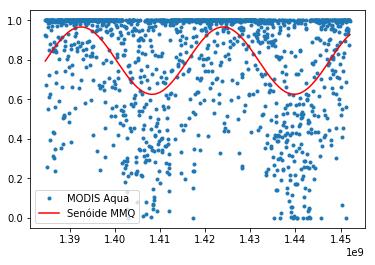

In [9]:
x = raw1.Time
y = raw1.CloudFraction
out = opt.curve_fit(f, x, y, p0=[1.5, 0.5, 2e-7, 1])
x = np.linspace(np.min(raw1.Time), np.max(raw1.Time), 1e3)
y = f(x, out[0][0], out[0][1], out[0][2], out[0][3])
plt.plot(raw1.Time, raw1.CloudFraction, '.', label="MODIS Aqua")
plt.plot(x, y, 'r', label="Senóide MMQ")
plt.legend()
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


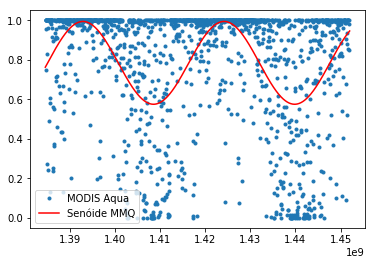

In [10]:
x = raw2.Time
y = raw2.CloudFraction
out = opt.curve_fit(f, x, y, p0=[1.5, 0.5, 2e-7, 1])
x = np.linspace(np.min(raw1.Time), np.max(raw1.Time), 1e3)
y = f(x, out[0][0], out[0][1], out[0][2], out[0][3])
plt.plot(raw2.Time, raw2.CloudFraction, '.', label="MODIS Aqua")
plt.plot(x, y, 'r', label="Senóide MMQ")
plt.legend()
plt.show()

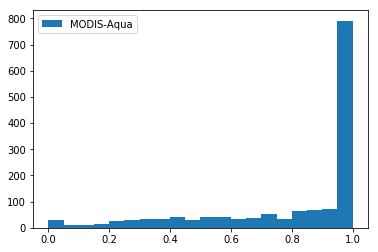

In [11]:
plt.hist(raw1.CloudFraction, bins=20, label="MODIS-Aqua")
plt.legend()
plt.show()

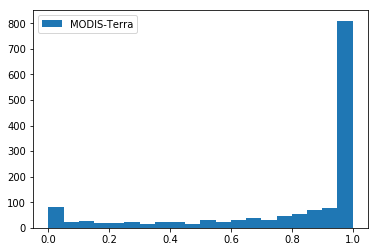

In [12]:
plt.hist(raw2.CloudFraction, bins=20, label="MODIS-Terra")
plt.legend()
plt.show()

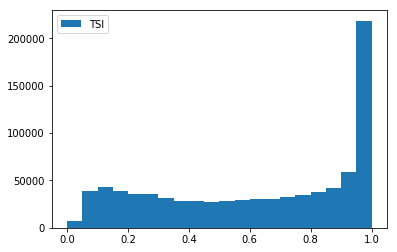

In [13]:
plt.hist(raw3.CloudFraction, bins=20, label="TSI")
plt.legend()
plt.show()

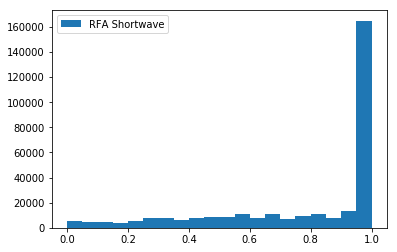

In [14]:
plt.hist(raw4.Shortwave_CloudFraction, bins=20, label="RFA Shortwave")
plt.legend()
plt.show()

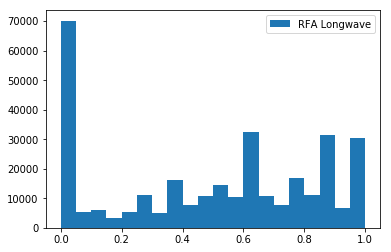

In [15]:
plt.hist(raw4.Longwave_CloudFraction, bins=20, label="RFA Longwave")
plt.legend()
plt.show()

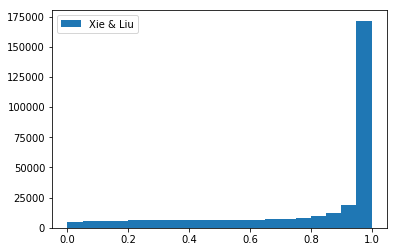

In [16]:
plt.hist(raw4.XL_CloudFraction, bins=20, range=(0, 1), label="Xie & Liu")
plt.legend()
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


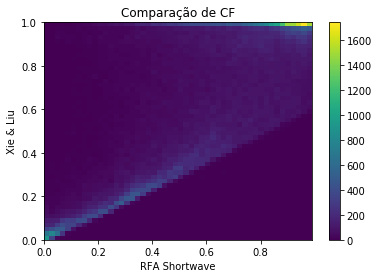

In [17]:
c = 1
raw5 = raw4[raw4.Shortwave_CloudFraction < c]
raw5 = raw5[raw4.XL_CloudFraction < c]
plt.hist2d(x=raw5.Shortwave_CloudFraction, y=raw5.XL_CloudFraction, bins=50)
plt.title("Comparação de CF")
plt.xlabel("RFA Shortwave")
plt.ylabel("Xie & Liu")
plt.colorbar()
plt.show()

In [63]:
raw = pd.read_csv("modis-terra.csv")